In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from wordcloud import WordCloud,STOPWORDS
from sklearn import metrics

In [2]:
df=pd.read_csv("Tweets.csv")

In [3]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df.shape

(14640, 15)

In [6]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

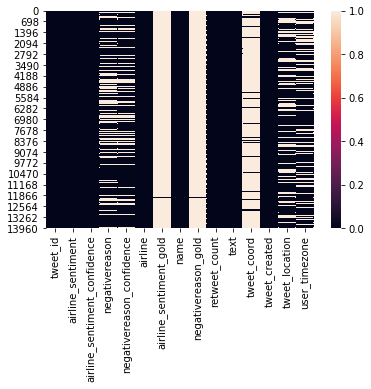

In [7]:
sns.heatmap(df.isnull())

Dropping null columns

In [8]:
df.drop(df.columns[df.isnull().sum()>1000],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
airline                         14640 non-null object
name                            14640 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_created                   14640 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 915.1+ KB


# Exploratory Data Analysis

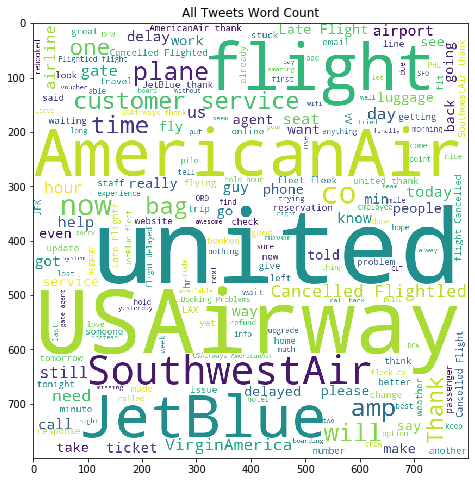

In [10]:
alltweets=" ".join(df.text)
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=12).generate(alltweets)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.title("All Tweets Word Count")
plt.show()

In [11]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

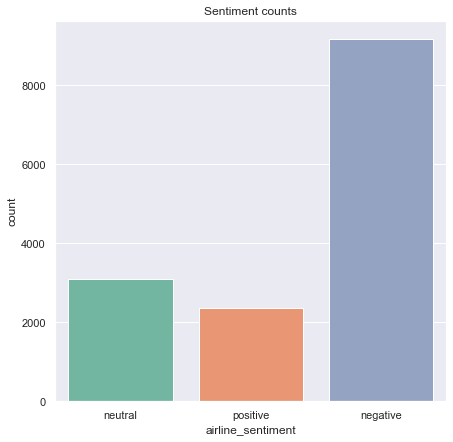

In [12]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=df.airline_sentiment,palette='Set2')
plt.title("Sentiment counts")
plt.show()

###            We see that maximum tweets are neagtive.

In [13]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

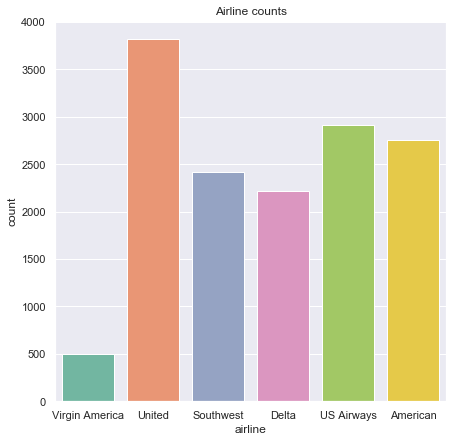

In [14]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=df.airline,palette='Set2')
plt.title("Airline counts")
plt.show()

United Airline has maximum tweets. So, we can say that United Airline is popular but we don't know if this popularity is good or bad. Virgin America Airline has minimum tweets, it gives the impression that the standard is neither good or bad.

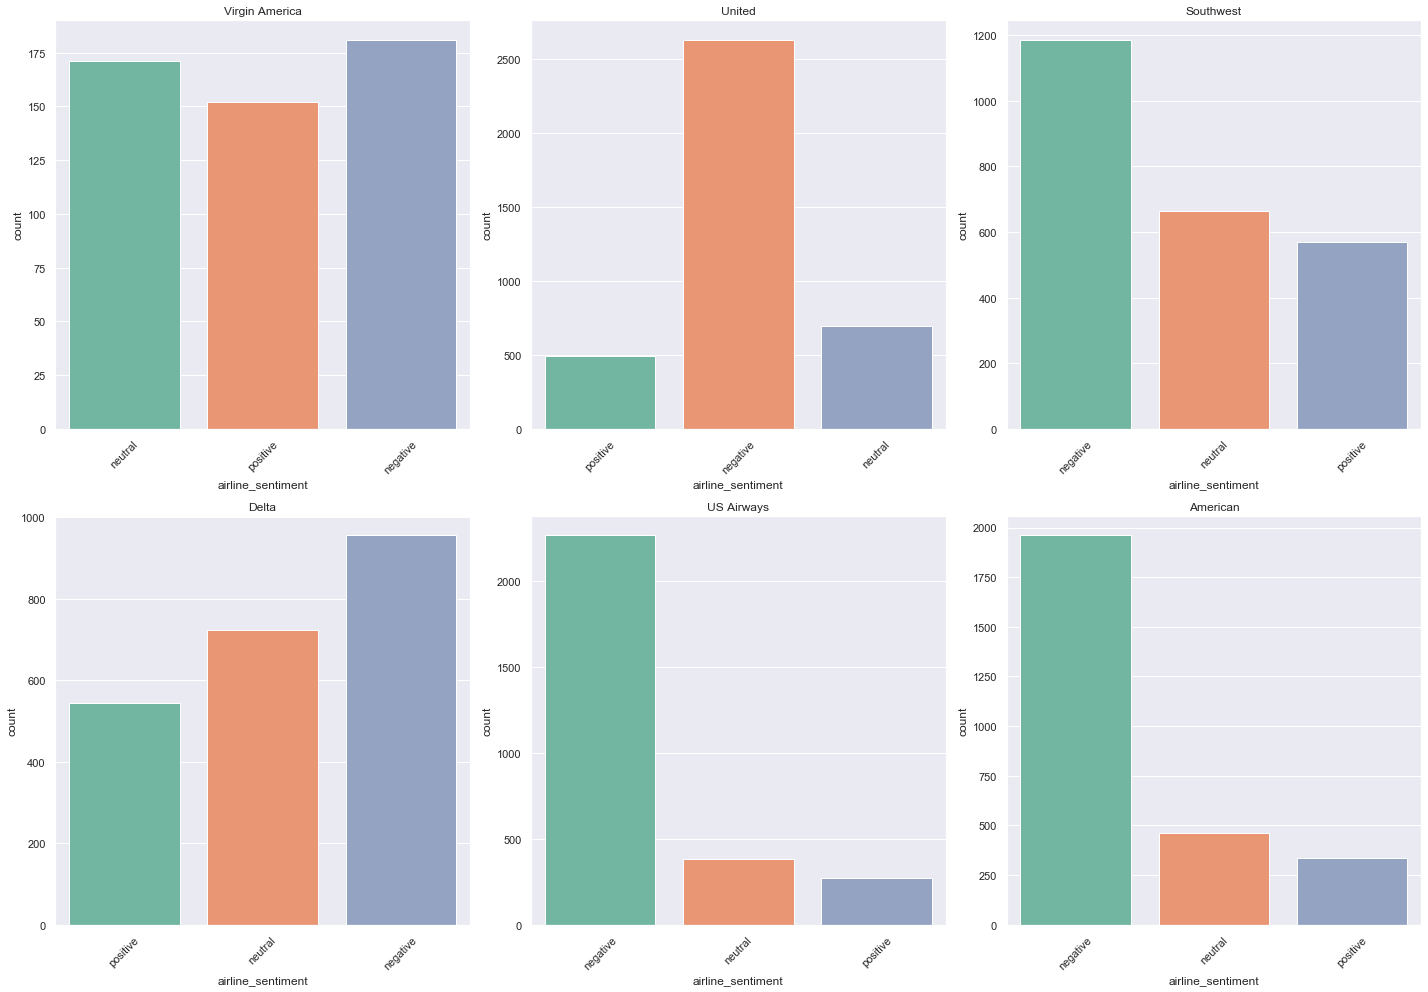

In [15]:
j=1
plt.subplots(figsize=(20,20),tight_layout=True)
for i in df["airline"].unique():
        x = df[df["airline"]==i]
        plt.subplot(3, 3, j)
        sns.countplot(x["airline_sentiment"],palette="Set2")
        plt.xticks(rotation=45)
        plt.title(i)
        j +=1
plt.show()

We are now able to comment on the emotions of the twits about companies. The United airline mentioned above has a very bad reputation in twitter. 

In [16]:
neg_tweets=df[df['airline_sentiment']=='negative']

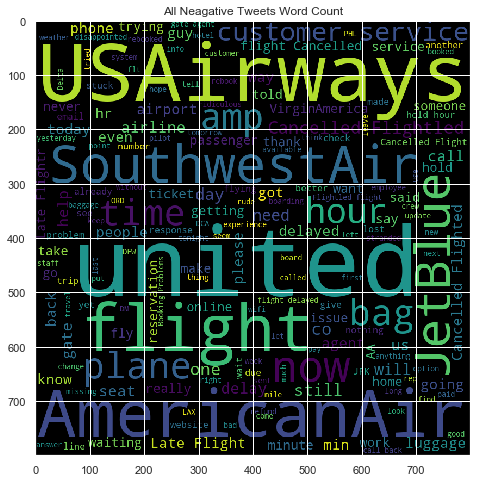

In [17]:
alltweets=" ".join(neg_tweets.text)
wordcloud = WordCloud(width=800,height=800,background_color='black',stopwords=STOPWORDS,min_font_size=12).generate(alltweets)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.title("All Neagative Tweets Word Count")
plt.show()

In [18]:
pos_tweets=df[df['airline_sentiment']=='positive']

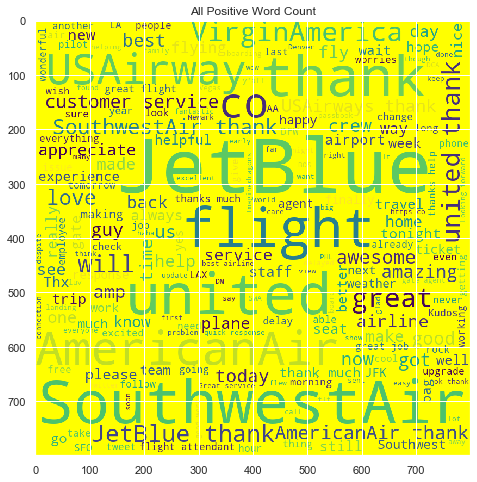

In [19]:
alltweets=" ".join(pos_tweets.text)
wordcloud = WordCloud(width=800,height=800,background_color='yellow',stopwords=STOPWORDS,min_font_size=12).generate(alltweets)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.title("All Positive Word Count")
plt.show()

# Data cleaning and Pre-Processing

In [20]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    return text

In [21]:
# -*- coding: utf-8 -*-

# Contraction Map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [22]:
def lemmatize_text(text):
    text = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return text

In [23]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [24]:
def normalize_corpus(corpus, text_lower_case=True,  contraction_expansion=True,
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus


Now, we will also use our normalization module to normalize our text field in dataset.

In [25]:
df['normalized_text']=normalize_corpus(df.text)

In [26]:

def display_model_performance_metrics(true_labels, predicted_labels):
    print('Model Performance metrics:')
    print('-'*30)
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
    print('\nModel Classification report:')
    print('-'*30)
    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels)
    print(report)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    print(cm) 
    


In [27]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,normalized_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,virginamerica dhepburn said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,virginamerica plus added commercial experience...
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,virginamerica not today must mean need take an...
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,virginamerica really big bad thing


## Sentiment Analysis with AFINN
The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis. It is a list of words rated for valence with an integer between minus five (negative) and plus five (positive). The current version of the lexicon is AFINN-en-165.txt and it contains over 3,300+ words with a polarity score associated with each word. The author has also created a nice wrapper library on top of this in Python called afinn which we will be using for our analysis needs. AFINN takes into account other aspects like emoticons and exclamations.

In [28]:
from afinn import Afinn
afn = Afinn(emoticons=True) 

Below we used a threshold of >= 1.0 to determine if the overall sentiment is positive else negative. You can choose your own threshold based on analyzing your own corpora in the future

In [29]:
sentiment_polarity = [afn.score(review) for review in df.normalized_text]

In [30]:
predicted_sentiments = ['positive' if score >= 2.0  else 'negative' for score in sentiment_polarity]

In [31]:
#consider neutral tweets as positive
actual_sentiments=df.airline_sentiment.replace("neutral","positive")

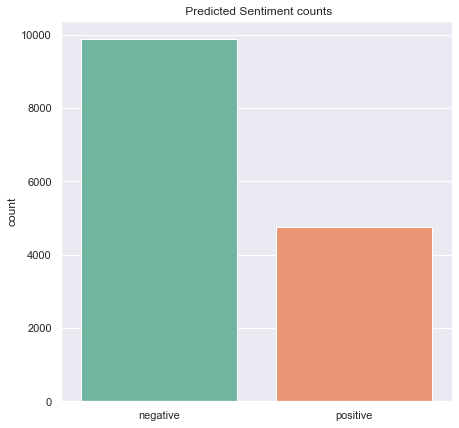

In [32]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=predicted_sentiments,palette='Set2')
plt.title(" Predicted Sentiment counts")
plt.show()

In [33]:
display_model_performance_metrics(actual_sentiments,predicted_sentiments)

Model Performance metrics:
------------------------------
Accuracy:  68.74% 
Precision: 68.06% 
Recall:    68.74% 
F1 Score:  68.24% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    negative       0.73      0.79      0.76      9178
    positive       0.59      0.52      0.55      5462

    accuracy                           0.69     14640
   macro avg       0.66      0.65      0.66     14640
weighted avg       0.68      0.69      0.68     14640


Prediction Confusion Matrix:
------------------------------
[[7242 1936]
 [2641 2821]]


## Classifying Sentiment with Supervised Learning

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn import svm

In [35]:
# build train and test datasets
train_reviews, test_reviews, train_sentiments, test_sentiments =\
    train_test_split(df.normalized_text, df.airline_sentiment , test_size=0.20,  random_state=101)

### Feature Engineering

In [36]:
# build BOW features on train reviews
countv = CountVectorizer()
cv_train_features = countv.fit_transform(train_reviews)

# build TFIDF features on train reviews
tv = TfidfVectorizer()
tv_train_features = tv.fit_transform(train_reviews)


# transform test reviews into features
cv_test_features = countv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

### Naive Bayes

In [37]:
#building classifier using naive bayes using BOW features
nb_bow =MultinomialNB()
nb_bow.fit(cv_train_features,train_sentiments)
predicted_nb_bow = nb_bow.predict(cv_test_features)
print('naive bayes using BOW features\n')
display_model_performance_metrics(test_sentiments,predicted_nb_bow)

#building classifier using naive bayes using TFIDF features
nb_tfidf =MultinomialNB()

nb_tfidf.fit(cv_train_features,train_sentiments)
predicted_nb_tfidf = nb_tfidf.predict(cv_test_features)
print('\n\nnaive bayes using TFIDF features\n')
display_model_performance_metrics(test_sentiments,predicted_nb_tfidf)

naive bayes using BOW features

Model Performance metrics:
------------------------------
Accuracy:  76.61% 
Precision: 76.96% 
Recall:    76.61% 
F1 Score:  73.91% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      1817
     neutral       0.74      0.37      0.49       628
    positive       0.84      0.50      0.63       483

    accuracy                           0.77      2928
   macro avg       0.78      0.61      0.66      2928
weighted avg       0.77      0.77      0.74      2928


Prediction Confusion Matrix:
------------------------------
[[1769   38   10]
 [ 361  231   36]
 [ 198   42  243]]


naive bayes using TFIDF features

Model Performance metrics:
------------------------------
Accuracy:  76.61% 
Precision: 76.96% 
Recall:    76.61% 
F1 Score:  73.91% 

Model Classification report:
------------------------------
              precision    recall  f1-score  

### Logistic Regression

In [38]:
#building classifier using logistic regression using BOW features
logR_bow=LogisticRegression()

logR_bow.fit(cv_train_features,train_sentiments)
predicted_LogR_bow = logR_bow.predict(cv_test_features)
print('logistic regression using BOW features\n')
display_model_performance_metrics(test_sentiments,predicted_LogR_bow)

#building classifier using logistic regression using TFIDF features
logR_tfidf=LogisticRegression()

logR_tfidf.fit(cv_train_features,train_sentiments)
predicted_LogR_tfidf = logR_tfidf.predict(cv_test_features)
print('\n\nlogistic regression using TFIDF features\n')
display_model_performance_metrics(test_sentiments,predicted_LogR_tfidf)

c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic regression using BOW features

Model Performance metrics:
------------------------------
Accuracy:  79.03% 
Precision: 78.41% 
Recall:    79.03% 
F1 Score:  78.59% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    negative       0.85      0.90      0.87      1817
     neutral       0.63      0.57      0.60       628
    positive       0.76      0.66      0.71       483

    accuracy                           0.79      2928
   macro avg       0.74      0.71      0.73      2928
weighted avg       0.78      0.79      0.79      2928


Prediction Confusion Matrix:
------------------------------
[[1636  137   44]
 [ 211  357   60]
 [  87   75  321]]


logistic regression using TFIDF features

Model Performance metrics:
------------------------------
Accuracy:  79.03% 
Precision: 78.41% 
Recall:    79.03% 
F1 Score:  78.59% 

Model Classification report:
------------------------------
              precision    re

### SVM classifier

In [39]:
#building Linear SVM classifier using BOW features
svm_bow=svm.LinearSVC()

svm_bow.fit(cv_train_features,train_sentiments)
predicted_svm_bow = svm_bow.predict(cv_test_features)
print('SVM classfier using BOW features\n')
display_model_performance_metrics(test_sentiments,predicted_svm_bow)

#building Linear SVM classfier using TFIDF features
svm_tfidf=svm.LinearSVC()

svm_tfidf.fit(cv_train_features,train_sentiments)
predicted_svm_tfidf = svm_tfidf.predict(cv_test_features)
print('\n\nSVM classfier using TFIDF features\n')
display_model_performance_metrics(test_sentiments,predicted_svm_tfidf)

SVM classfier using BOW features

Model Performance metrics:
------------------------------
Accuracy:  76.33% 
Precision: 76.26% 
Recall:    76.33% 
F1 Score:  76.29% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      1817
     neutral       0.56      0.57      0.57       628
    positive       0.69      0.66      0.68       483

    accuracy                           0.76      2928
   macro avg       0.70      0.70      0.70      2928
weighted avg       0.76      0.76      0.76      2928


Prediction Confusion Matrix:
------------------------------
[[1559  201   57]
 [ 187  357   84]
 [  89   75  319]]


SVM classfier using TFIDF features

Model Performance metrics:
------------------------------
Accuracy:  76.33% 
Precision: 76.26% 
Recall:    76.33% 
F1 Score:  76.29% 

Model Classification report:
------------------------------
              precision    recall  f1-sco